# Лабораторная работа 4

# Правильный многоугольник Рело. Векторизация вычислений в numpy

Ковалевская В.С., 17. 03. 2022

## Определения и свойства

**Треугольник Рело** представляет собой область пересечения трех кругов радуса $r$ с центрами в вершинах равностороннего треугольника с длиной стороны $r$.

**Правильный $n$ -угольник Рело** представляет собой область пересечения $n$ кругов радуса $r$ с центрами в вершинах правильного $n$-угольника с нечетным числом сторон длины $l$. Радиус круга $r$ согласован с длиной стороны $l$ правильного многоугольника таким образом, чтобы окружность радиуса $r$ проходила через две соседние вершины правильного $n$-угольника.

Правильный многоугольник Рело и круг являются примерами **фигур постоянной ширины**. Для фигуры постоянной ширины можно построить пары параллельных опорных прямых, которые касаются фигуры, но не пересекают ее, и, независимо от выбора пары опорных прямых, расстояние между прямыми будет всегда одинаковым.

Расстояние между опорными прямыми называется **шириной фигуры**. Ширина правильного многоугольника Рело равна радиусу $r$ пересекающихся кругов. Ширина круга равна диаметру круга. Среди всех фигур постоянной ширины треугольник Рело имеет наименьшую площадь, круг имеет наибольшую площадь.

# Задание 4.1 (Правильный многоугольник Рело)

$\color{red}{Напишите}$ пользовательскую функцию **regular_polygon_Relo(n, center, r, N)**, которая возвращает матрицу, каждая строка которой содержит координаты точек, описывающих границу правильного многоугольника Рело.

Аргументы пользовательской функции имеют следующий смысл:

* **n**: количество вершин правильного многоугольника Рело; является нечетным целым числом большим 2; стандартное значение $n = 3$;

* **center**: массив координат центра правильного многоугольника Рело; стандартнное значение $center = np.array([0,0])$;

* **r**: ширина правильного многоугольника Рело; является положительным числом; стандартное значение $r = 1$;

* **N**: количество точек для описания одной стороны правильного многоугольника Рело; является натуральным числом; стандартное значение $N = 100$.

## Реализация задания 4.1

In [1]:
import math #импортируем нужные модули
import numpy as np
import matplotlib.pyplot as plt

### Этап 1. Построение треугольника Рело

#### 1. Определение переменных

In [2]:
n = 3 # количество вершин треугольника Рело
center = np.array([0,0]) # координаты центра треугольника Рело
r = 10. # ширина треугольника Рело
N = 100 # количество точек для описания стороны треугольника Рело

#### 2. Вычисление координат вершин правильного треугольника

Вершины правильного многоугольника расположены на окружности, описанной вокруг многоугольника. Радиус $R$ окружности, описанной вокруг правильного $n$-угольника с длиной стороны $l$, вычисляется по формуле $$R = \frac{l}{2sin\pi/n}.$$

Длина стороны $l$ правильного треугольника, на котором будем строить треугольник Рело, совпадает с шириной треугольника Рело $r$.

In [3]:
l = r # !!! равенство справедливо только для треугольника Рело

Вычислим радиус $R$ описанной окружности

In [4]:
R = l/(2*math.sin(math.pi/n)) #радиус описанной окружности
R

5.773502691896258

Введем прямоугольную декартову систему координат. Построим матрицу с координатами вершин правильного треугольника. Центр треуголника размещаем в точке $center$, радиус описанной окружности полагаем равным $R$.

In [5]:
t = np.arange(0,2*np.pi,2*np.pi/n) #получаем array от start = 0 до stop = 2*np.pi с шагом step = 2*np.pi/n 

# обратите внимание на векторизацию вычислений с массивами без использования циклов
vertices = center + R*np.transpose([np.cos(t), np.sin(t)]) #строим матрицу с координатами вершин правильного треугольника
vertices

array([[ 5.77350269,  0.        ],
       [-2.88675135,  5.        ],
       [-2.88675135, -5.        ]])

In [6]:
print(t)
print(R*np.transpose([np.cos(t), np.sin(t)]))
arc = np.array([1,1])
v = arc + R*np.transpose([np.cos(t), np.sin(t)])
v, v[:,0]

[0.        2.0943951 4.1887902]
[[ 5.77350269  0.        ]
 [-2.88675135  5.        ]
 [-2.88675135 -5.        ]]


(array([[ 6.77350269,  1.        ],
        [-1.88675135,  6.        ],
        [-1.88675135, -4.        ]]),
 array([ 6.77350269, -1.88675135, -1.88675135]))

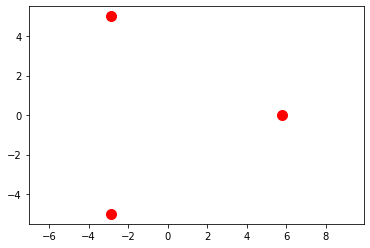

In [7]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.axis('equal');

#### 3. Представление одной стороны треугольника Рело

Обозначим через $\alpha$ центральный угол, соответствующий стороне правильногo $n$-угольника. Тогда $$\alpha = 2\pi/n.$$

Обозначим через $\beta$ центральный угол, соответствующий стороне правильного многоугольника Рело, когда центр окружности расположен в вершине правильного многоугольника. Тогда $$\beta = \alpha/2.$$

Построим матрицу с координатами точек, описывающих сторону треугольника Рело относительно вершины vertices[0]. Сторона представляет собой дугу окружности радиуса $r$ с центром в точке vertices[0] и значением угла $[\pi - \beta/2, \pi + \beta/2]$.

Вычислим значения введенных величин

In [8]:
alpha = 2*math.pi/n #центральный угол, соответствующий одной стороне правильного многоугольника
beta = alpha/2 # центральный угол, соответствующий стороне многоугольника, когда центр окр=ти расположен в вершине многоугольника

Введем вспомогательную последовательность значений угла для построения координат точек стороны треугольника Рело

In [9]:
angle = np.linspace(-beta/2, beta/2, N) #генерация последовательности чисел в линейном пространстве с одинаковым размером шага
len(angle)

100

Строим матрицу с координатами точек первой стороны

In [10]:
# обратите внимание на векторизацию вычислений с массивами без использования циклов
side0 = vertices[0] + r*np.transpose([np.cos(angle + np.pi), np.sin(angle + np.pi)]) # матрица координат точек одной стороны многоугольника

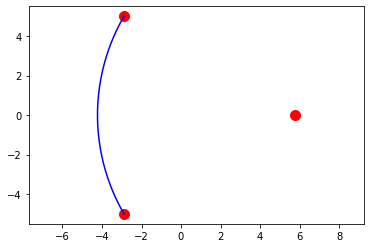

In [11]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20) #вершины
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20) #одна сторона
plt.axis('equal');

Построим матрицу с координатами точек, описывающих сторону треугольника Рело относительно второй вершины vertices[1]. Сторона представляет собой дугу окружности радиуса $r$ с центром в точке vertices[1] и значением угла $[\pi + \alpha - \beta/2, \pi + \alpha + \beta/2]$.

In [12]:
# обратите внимание на векторизацию вычислений с массивами без использования циклов
side1 = vertices[1] + r*np.transpose([np.cos(angle + np.pi + alpha), np.sin(angle + np.pi + alpha)])#матрица координат точек второй стороны многоугольника

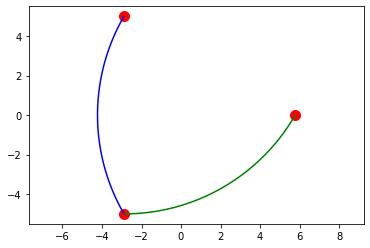

In [13]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)#вершины
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)#одна сторона
plt.plot(side1[:,0],side1[:,1],'g-',markersize=20)#вторая сторона
plt.axis('equal');

#### 4. Моделирование границы треугольника Рело

Создадим список из матриц, каждая их которых содержит координаты точек одной из сторон треугольника Рело

In [14]:
# обратите внимание на векторизацию вычислений с массивами без использования циклов
list_sides = [vertices[i] + r*np.transpose([np.cos(angle + np.pi + i*alpha), np.sin(angle + np.pi + i*alpha)]) for i in range(n)]

С помощью фунции **concatenate** из расширения numpy объединим массивы для каждой из сторон в единый массив sides

In [15]:
sides = np.concatenate(list_sides) #объединяем массивы для каждой из сторон многоугольника в единый массив

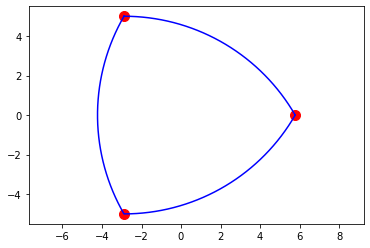

In [16]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)#вершины
plt.plot(sides[:,0],sides[:,1],'b-',markersize=20)#стороны
plt.axis('equal');

### Этап 2. Построение правильного многоугольника Рело

Следуя аналогичным рассуждениям из Этапа 1, $\color{red}{создайте}$ матричное описание границы правильного многоугольника Рело для произвольных значений переменных n, center, r, N.

$\color{red}{Внимание:}$ длина стороны $l$ правильного многоугольника, на основании которого строится многоугольник Рело, является неизвестной величиной и должна быть выражена через количество вершин $n$ и ширину $r$ многоугольника Рело.

$\color{red}{Напишите}$ подробно, как получена аналитическая зависимость $l$ от $n$ и $r$. Объяснения оформите в тексте документа с лабораторной работой.

Пусть А - одна из вершин правильного n-угольника Рело, ВС = l, сторона, лежащая напротив вершины А. Угол альфа $\alpha$ - центральный угол, соответствующий стороне правильногo $n$-угольникаб $\alpha = 2\pi/n.$ $\beta$ центральный угол, соответствующий стороне правильного многоугольника Рело, когда центр окружности расположен в вершине правильного многоугольника, $\beta = \alpha/2.$

Рассмотрим треугольник АВС. В нем угол $АВС = \beta$, BC = l. BA = CA = r, т.е. треугольник АВС - равнобедренный (1). Проведем из т. А высоту АН на ВС, тогда по (1) - ВН = НС = l/2, $BAH = \beta/2 $. В прямоугольном треугольнике ВАН: $\sin(\frac{\beta}{2}) = \frac{l r}{2}$. Отсюда $l = 2r\sin(\frac{\beta}{2}).$

Используя формулу нахождения длины стороны l, построим правильный 5-угольник Рело.

In [17]:
n_5 = 5 #кол-во вершин многоугольника
center_5 = np.array([0,0]) #массив координат центра правильного многоугольника
r_5 = 10. #ширина правильного многоугольника 
N_5 = 100 #количество точек для описания одной стороны правильного многоугольника

In [18]:
alpha_5 = 2*math.pi/n_5 #центральный угол, соответствующий стороне правильног n-угольника
beta_5 = alpha_5/2 #центральный угол, соответствующий стороне правильного многоугольника Рело, когда центр окружности расположен в вершине правильного многоугольника

In [19]:
l_5 = 2*r_5*math.sin(beta_5/2) #длина стороны
l_5

6.180339887498948

In [20]:
R_5 = l_5/(2*math.sin(math.pi/n_5)) #R окружности, описанной вокруг правильного 
R_5

5.257311121191336

In [21]:
t_5 = np.arange(0,2*np.pi,2*np.pi/n_5)

vertices_5 = center_5 + R_5*np.transpose([np.cos(t_5), np.sin(t_5)]) #координаты вершин правильного многоугольника
vertices_5

array([[ 5.25731112,  0.        ],
       [ 1.62459848,  5.        ],
       [-4.25325404,  3.09016994],
       [-4.25325404, -3.09016994],
       [ 1.62459848, -5.        ]])

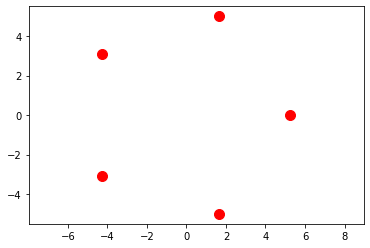

In [22]:
plt.plot(vertices_5[:,0],vertices_5[:,1],'r.',markersize=20) #вершины
plt.axis('equal');

In [23]:
angle_5 = np.linspace(-beta_5/2, beta_5/2, N_5)#генерация последовательности чисел в линейном пространстве с одинаковым размером шага

In [24]:
side0_5 = vertices_5[0] + r_5*np.transpose([np.cos(angle_5 + np.pi), np.sin(angle_5 + np.pi)]) #матрицa с координатами точек первой стороны

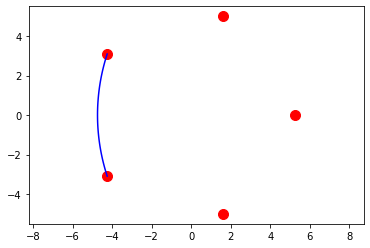

In [25]:
plt.plot(vertices_5[:,0],vertices_5[:,1],'r.',markersize=20)#вершины
plt.plot(side0_5[:,0],side0_5[:,1],'b-',markersize=20)#одна сторона
plt.axis('equal');

In [26]:
side1_5 = vertices_5[1] + r_5*np.transpose([np.cos(angle_5 + np.pi + alpha_5), np.sin(angle_5 + np.pi + alpha_5)])#массив координат точек второй стороны многоугольника

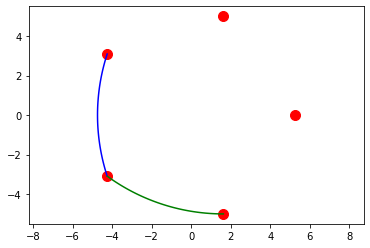

In [27]:
plt.plot(vertices_5[:,0],vertices_5[:,1],'r.',markersize=20)#вершины
plt.plot(side0_5[:,0],side0_5[:,1],'b-',markersize=20)#одна сторона
plt.plot(side1_5[:,0],side1_5[:,1],'g-',markersize=20)#вторая сторона
plt.axis('equal');

Создадим список из матриц, каждая их которых содержит координаты точек одной из сторон пятиугольника Рело

In [35]:
list_sides_5 = [vertices_5[i] + r_5*np.transpose([np.cos(angle_5 + np.pi + i*alpha_5), np.sin(angle_5 + np.pi + i*alpha_5)]) for i in range(n_5)]

In [36]:
sides_5 = np.concatenate(list_sides_5) #c помощью фунции concatenate из расширения numpy объединим массивы для каждой из сторон в единый массив sides

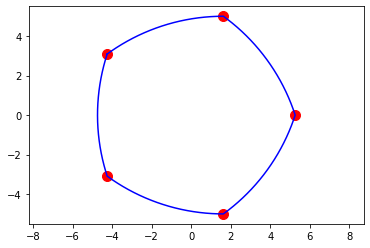

In [30]:
plt.plot(vertices_5[:,0],vertices_5[:,1],'r.',markersize=20)#вершины
plt.plot(sides_5[:,0],sides_5[:,1],'b-',markersize=20)#стороны многоугольника
plt.axis('equal');

### Этап 3. Результирующая пользовательская функция

$\color{red}{Напишите}$ результирующую пользовательскую функцию **regular_polygon_Relo(n, center, r, N)** на основании кода из Этапа 2.

Для функции regular_polygon_Relo $\color{red}{напишите}$ строки документации.

$\color{red}{Протестируйте}$ функцию regular_polygon_Relo для различных значений аргументов в предположении, что корректность вводимых данных не гарантируется.

$\color{red}{Постройте}$ в одной системе координат правильные многоугольники Рело для различного количества вершин и различных положений центров. При этом $\color{red}{вызывайте}$ функцию regular_polygon_Relo с различными способами указания позиционных и ключевых аргументов.

$\color{red}{Создайте}$ модуль relo.py, в котором будет содержаться пользовательская функция regular_polygon_Relo.

In [31]:
def regular_polygon_Relo(n = 3, center = np.array([0,0]), r = 1, N = 100):
    """
    Arguments: 
    n: количество вершин правильного многоугольника Рело,
    значение по умодчанию n = 3;
    
    center: массив координат центра правильного многоугольника Рело
    значение по умодчанию center = np.array([0,0]);
    
    r: ширина правильного многоугольника Рело,
    значение по умодчанию r = 1;
    
    N: количество точек для описания одной стороны правильного многоугольника Рело,
    значение по умодчанию N = 100.
    
    Return: sides_n
    
    Функция возвращает матрицу, каждая строка которой содержит
    координаты точек, описывающих границу правильного многоугольника Рело
    """
    assert r > 0, 'radius r should be positive' #оператор assert генерирует исключение по условию
    assert n % 2 == 1, 'the number of vertices must be odd' #n % 2 == 1 - остаток от деления на 2 = 1 - число нечетное
    assert isinstance(n,int) and n >= 3, 'the number of vertices should be integer and greater than 2' #isinstance(n,int) - проверяем является ли число целым
    assert isinstance(N,int) and N > 0, 'N should be natural number'
    
    alpha = 2*math.pi/n
    beta = alpha/2
    center = np.array(center)
    
    l = 2*r*math.sin(beta/2) #считаем длину стороны правильного n-угольника Рело
    R = l/(2*math.sin(math.pi/n)) #радиус окружности, описанной вокруг правильного n-угольника со стороной l
    
    t = np.arange(0,2*np.pi,2*np.pi/n)
    vertices = center + R*np.transpose([np.cos(t), np.sin(t)]) #координаты вершин правильного n-угольника
    angle = np.linspace(-beta/2, beta/2, N)
    
    list_sides = [vertices[i] + r*np.transpose([np.cos(angle + np.pi + i*alpha), np.sin(angle + np.pi + i*alpha)]) for i in range(n)]
    sides_n = np.concatenate(list_sides)
    
    return sides_n

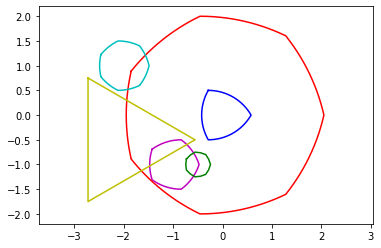

In [32]:
pol_1 = regular_polygon_Relo()
pol_2 = regular_polygon_Relo(5, np.array([-1,-1]))
pol_3 = regular_polygon_Relo(7, np.array([-0.5,-1]),0.5,3)
pol_4 = regular_polygon_Relo(n = 7, r = 4)
pol_5 = regular_polygon_Relo(7, np.array([-2,1]))
pol_6 = regular_polygon_Relo(n = 3, center = np.array([-2,-0.5]), N = 2, r = 2.5)

plt.plot(pol_1[:,0],pol_1[:,1],'b-',markersize=20)
plt.plot(pol_2[:,0],pol_2[:,1],'m-',markersize=20)
plt.plot(pol_3[:,0],pol_3[:,1],'g-',markersize=20)
plt.plot(pol_4[:,0],pol_4[:,1],'r-',markersize=20)
plt.plot(pol_5[:,0],pol_5[:,1],'c-',markersize=20)
plt.plot(pol_6[:,0],pol_6[:,1],'y-',markersize=20)
plt.axis('equal');

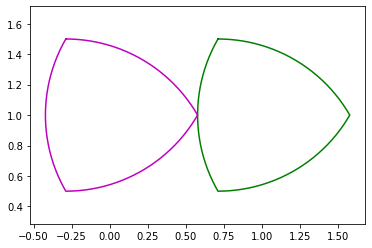

In [33]:
pl1 = regular_polygon_Relo(center = 1)
pl2 = regular_polygon_Relo(center = [0,1])

plt.plot(pl1[:,0],pl1[:,1],'g-',markersize=20)
plt.plot(pl2[:,0],pl2[:,1],'m-',markersize=20)
plt.axis('equal');

In [34]:
 regular_polygon_Relo(0) #n = 0 - исключение по условию, т.к. n должно быть нечетным и большим 2

AssertionError: the number of vertices must be odd

In [ ]:
regular_polygon_Relo(9,r = -4) #r= -4  - исключение по условию, т.к. r > 0

In [ ]:
import relo #создали и импортировали модуль relo.py

In [ ]:
pol = relo.regular_polygon_Relo() #из модуля вызвали функцию regular_polygon_Relo

In [ ]:
plt.plot(pol[:,0],pol[:,1],'c-',markersize=20)
plt.axis('equal');